<a href="https://colab.research.google.com/github/Pranjalll2/DASHBOARD/blob/master/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00


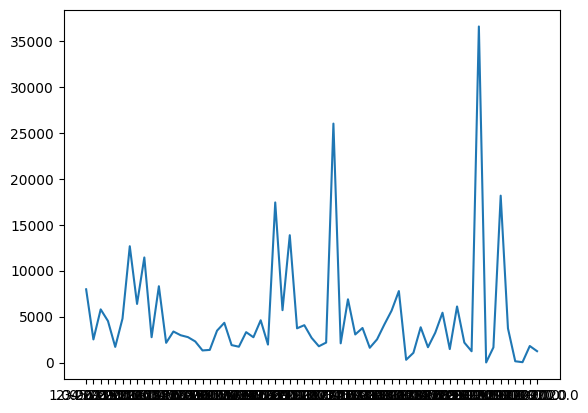

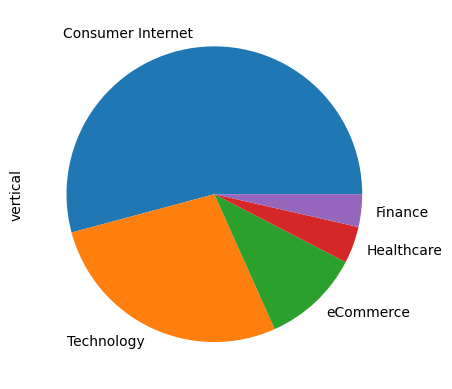

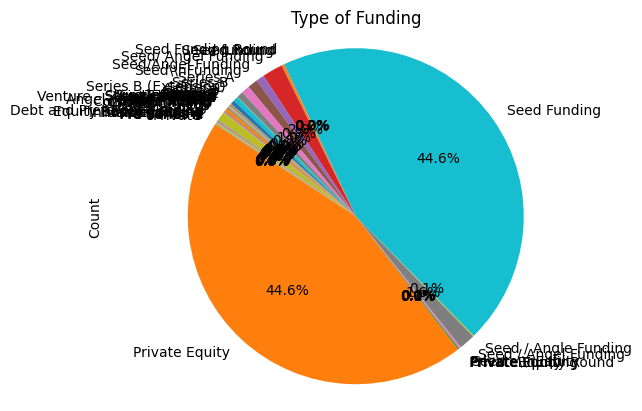

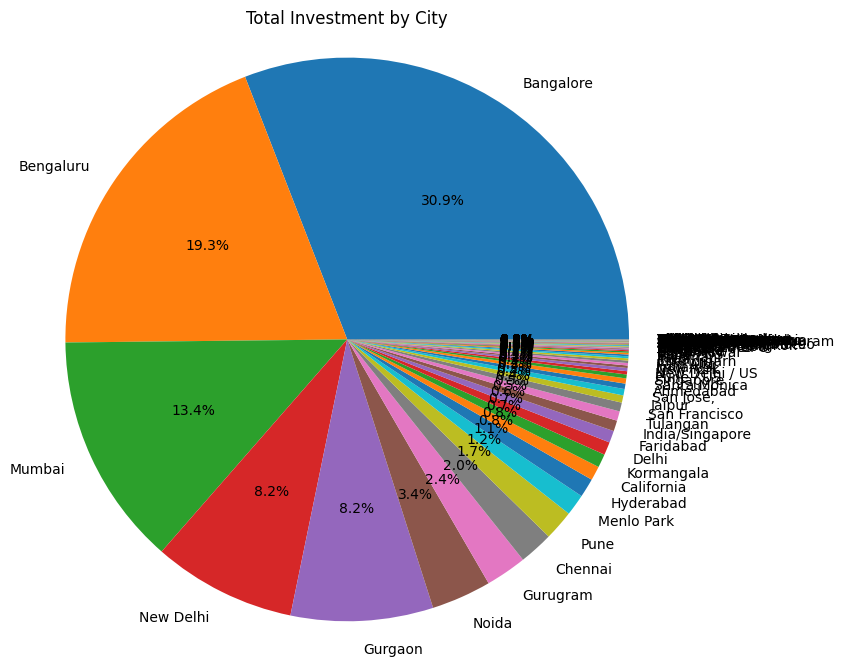

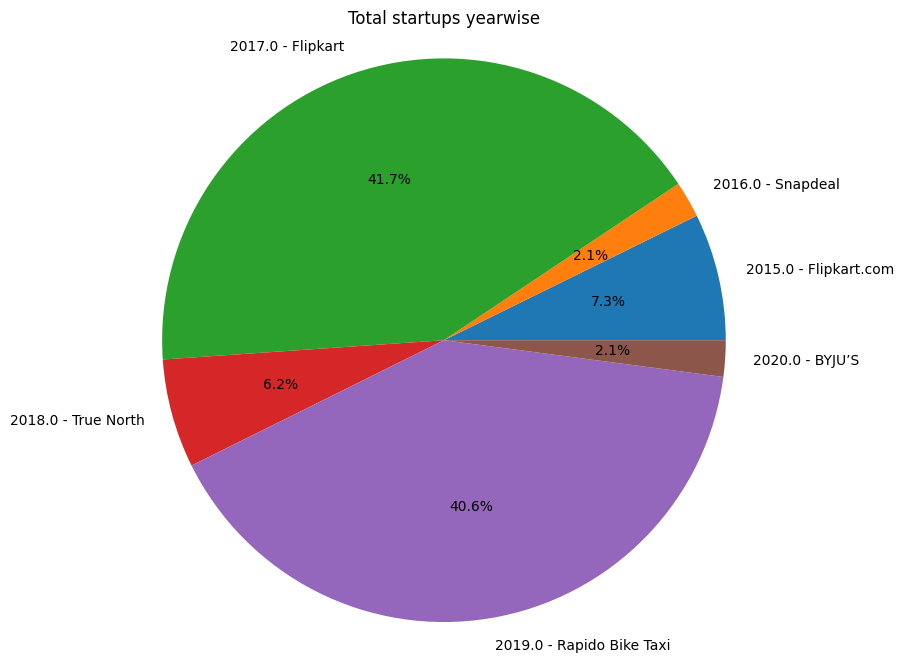

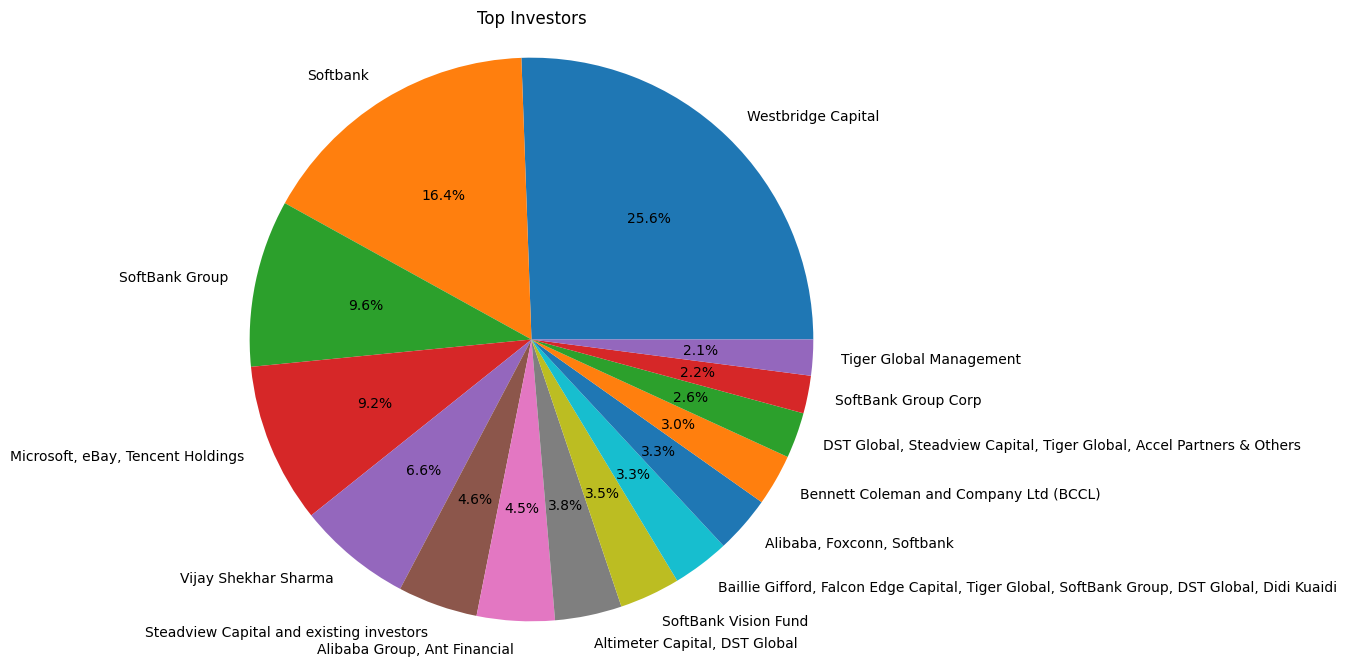

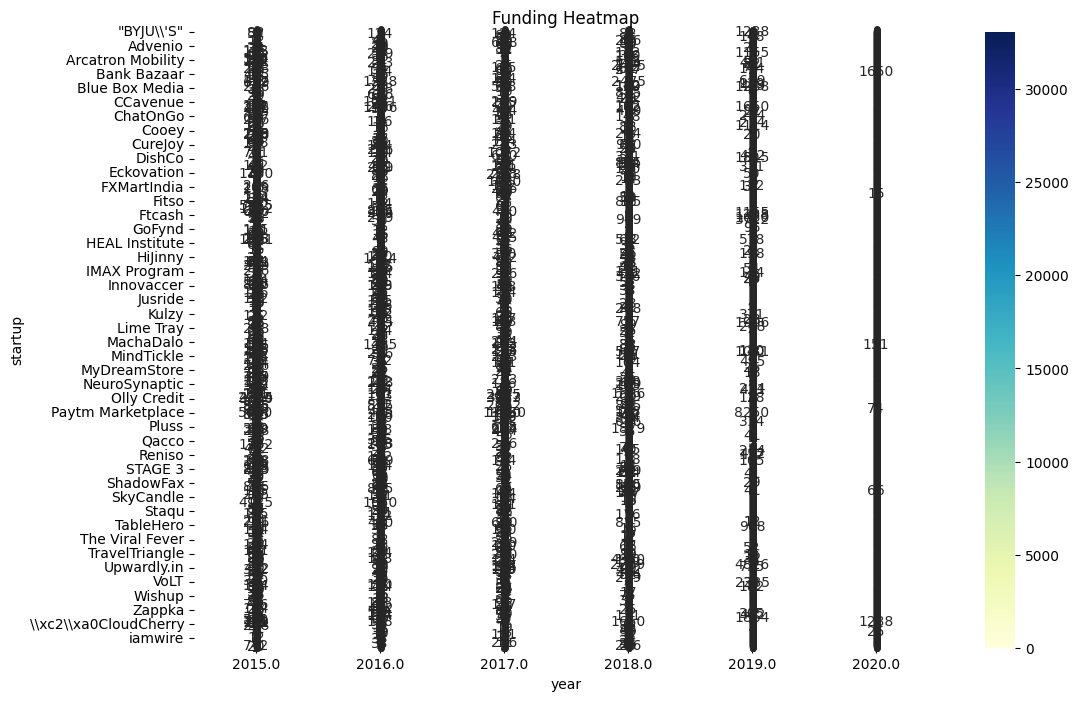

In [3]:
import streamlit as st
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

st.set_page_config(layout='wide',page_title='Startup Analysis')
st.title("FS23AI021 Pranjal Sutar")



df = pd.read_csv("/content/startup_clean.csv")
df['date'] = pd.to_datetime(df['date'],errors='coerce')
df['month'] = df['date'].dt.month
df['year']=df['date'].dt.year
def load_investor_details(investor):
    st.title(investor)
    st.subheader('Most Recent Investments')
    last5_df = df[df['investors'].str.contains(investor,na=False)].head(5)[['date','startup','vertical','city','round','amount']]
    st.dataframe(last5_df)
    st.subheader('Maximum Investment')
    last5_dff = df[df['investors'].str.contains(investor,na=False)].groupby('startup')['amount'].sum().sort_values(ascending=False).head(1)
    st.dataframe(last5_dff)


    col1, col2 = st.columns(2)
    with col1:
        big_series = df[df['investors'].str.contains(investor,na=False)].groupby('startup')['amount'].sum().sort_values(ascending=False).head()
        st.subheader('Biggest Investments')
        fig, ax = plt.subplots()
        ax.bar(big_series.index,big_series.values)
        st.pyplot(fig)


    with col2:
        vertical_series = df[df['investors'].str.contains(investor,na=False)].groupby('vertical')['amount'].sum().sort_values()
        st.subheader('Sectors invested in')
        fig1, ax1 = plt.subplots()
        ax1.pie(vertical_series,labels= vertical_series.index,autopct="%0.01f%%")
        st.pyplot(fig1)

    col3, col4 = st.columns(2)
    with col3:
        cities = df[df['investors'].str.contains(investor, na=False)].groupby('city')['amount'].sum()
        st.subheader("Cities invested in")
        fig2, ax2 = plt.subplots()
        ax2.pie(cities, labels=cities.index, autopct="%0.01f%%")
        st.pyplot(fig2)


    with col4:
        rounds = df[df['investors'].str.contains('3one4 Capital', na=False)].groupby('round')['amount'].sum()
        st.subheader('Rounds')
        fig3, ax3 = plt.subplots()
        ax3.bar(rounds.index, rounds.values)
        st.pyplot(fig3)

    col5, col6 = st.columns(2)
    with col5:
        dates = df[df['investors'].str.contains(investor, na=False)].groupby('date')['amount'].sum().sort_values()
        st.subheader("Dates")
        fig4, ax4 = plt.subplots()
        ax4.pie(dates, labels=dates.index, autopct="%0.01f%%")
        st.pyplot(fig4)

    with col6:
        df['year'] = pd.to_datetime(df['date']).dt.year
        yearly = df[df['investors'].str.contains('IDG Ventures', na=False)].groupby('year')['amount'].sum()
        st.subheader('Yearly Investment')
        fig6, ax6 = plt.subplots()
        ax6.plot(yearly.index, yearly.values)
        st.pyplot(fig6)



st.sidebar.title('Startup Funding Analysis')
option = st.sidebar.selectbox('Select One',['Overall Analysis','Startup','Investor'])

def load_overall_analysis():
    st.title("Overall Analysis")
    #total invested amount
    total = round(df['amount'].sum())
    max_funding = df.groupby('startup')['amount'].max().sort_values(ascending=False).head(1).values[0]
    #avg ticket size
    avg_funding = df.groupby('startup')['amount'].sum().mean()
    #total funded startups
    num_startups = df['startup'].nunique()

    col1, col2, col3, col4 = st.columns(4)
    with col1:
        st.metric('Total',str(total)+'Cr')
    with col2:
        st.metric('Max',str(max_funding)+'Cr')
    with col3:
        st.metric('Avg',str(round(avg_funding))+'Cr')
    with col4:
        st.metric('Funded Startups',num_startups)

    st.header('MoM Graph')
    selected_option = st.selectbox('select type', ['total', 'count'])
    if selected_option == 'total':
        temp_df = df.groupby(['year', 'month'])['amount'].sum().reset_index()
    else:
        temp_df = df.groupby(['year', 'month'])['amount'].count().reset_index()
#MoM graph
    temp_df['x_axis'] = temp_df['month'].astype('str') + '-' + temp_df['year'].astype('str')
    fig3, ax3 = plt.subplots()
    ax3.plot(temp_df['x_axis'], temp_df['amount'])
    st.pyplot(fig3)

    # Sector Analysis pie
    st.title('Sector Analysis')
    st.write("Top 10 Sectors")
    top_verticals = df['vertical'].value_counts().head(5)
    fig, ax = plt.subplots()
    top_verticals.plot(kind='pie', ax=ax)
    st.pyplot(fig)

    # Type of funding
    st.subheader("Type of funding")
    funding = df.groupby('round').size()
    funding_sum = df.groupby('round')['amount'].sum()
    type_of_funding = pd.DataFrame({'Count': funding, 'Total': funding_sum})
    fig, ax = plt.subplots()
    type_of_funding['Count'].plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=ax)
    ax.set_title('Type of Funding')
    ax.axis('equal')
    st.pyplot(fig)


    # City wise funding
    st.subheader("City wise funding")
    total_investment = df.groupby('city')['amount'].sum().fillna(0)
    total_investment = total_investment.sort_values(ascending=False)
    total_investment = total_investment.reset_index()

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(total_investment['amount'], labels=total_investment['city'], autopct='%1.1f%%')
    ax.set_title('Total Investment by City')
    ax.axis('equal')
    st.pyplot(fig)

    #Top startups -> yearwise
    st.subheader("Top Startups -> yearwise")
    yearly_startup = df.groupby(['year', 'startup'])['amount'].sum().reset_index()
    sorted_values = yearly_startup.sort_values(by=['year', 'amount'], ascending=[True, False])
    top_startup = sorted_values.groupby('year').head(1).reset_index(drop=True)
    fig, ax = plt.subplots(figsize=(8, 8))
    labels = [f"{row['year']} - {row['startup']}" for _, row in top_startup.iterrows()]
    ax.pie(top_startup['amount'], labels=labels, autopct='%1.1f%%')
    ax.set_title('Total startups yearwise')
    ax.axis('equal')

    # Displaying the plot in Streamlit
    st.pyplot(fig)

    #Top investors
    st.subheader("Top investors")
    investor_totals = df.groupby('investors')['amount'].sum().reset_index()
    investor_totals = investor_totals.sort_values(by='amount', ascending=False)
    top_investors = investor_totals.head(15)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(top_investors['amount'], labels=top_investors['investors'], autopct='%1.1f%%')
    ax.set_title('Top Investors')
    ax.axis('equal')
    st.pyplot(fig)

    #Funding Heatmaps
    st.header('Funding Heatmap')
    heatmap_data = df.pivot_table(index='startup', columns='year', values='amount', aggfunc='sum', fill_value=0)

    # Create a heatmap using Seaborn
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5)
    plt.title('Funding Heatmap')
    st.pyplot(plt)



def load_startup_details(startup):
        st.header('Founders:')
        first = df[df['startup'] == startup]
        second = first['investors']
        investors_df = pd.DataFrame(second, columns=['investors']).reset_index()
        st.write(investors_df)

        st.header('Industry:')
        df1 = df[df['startup'] == startup]
        funding = df1.groupby('vertical')['amount'].sum().reset_index()
        st.write(funding)

        df1 = df[df['startup'] == startup]
        funding = df1.groupby('vertical')['amount'].sum()
        fig, ax = plt.subplots()
        ax.pie(funding, labels=funding.index, autopct='%1.1f%%')
        ax.set_title('Funding Distribution by Sector ')
        ax.axis('equal')
        st.pyplot(fig)

        st.header('Subindustry:')
        df1 = df[df['startup'] == startup]
        funding = df1.groupby('subvertical')['amount'].sum().reset_index()
        st.write(funding)


        df1 = df[df['startup'] == startup]
        sector_funding = df1.groupby('subvertical')['amount'].sum()
        fig, ax = plt.subplots()
        ax.pie(sector_funding, labels=sector_funding.index, autopct='%1.1f%%')
        ax.axis('equal')
        st.pyplot(fig)

        st.header('Location:')
        st.write('By amount:')
        startup_df = df[df['startup'] == startup]
        startup_df = startup_df.dropna(subset=['city'])
        city_funding = startup_df.groupby('city')['amount'].sum().reset_index()
        st.dataframe(city_funding)


        startup_df = df[df['startup'] == startup]
        startup_df = startup_df.dropna(subset=['city'])
        city_funding = startup_df.groupby('city')['amount'].sum()
        fig, ax = plt.subplots()
        ax.pie(city_funding, labels=city_funding.index, autopct='%1.1f%%')
        ax.axis('equal')
        st.pyplot(fig)

        st.subheader('Funding Rounds:')
        funding_rounds= df[['round', 'investors', 'date']].sort_values('date', ascending=False)
        st.dataframe(funding_rounds)


if option=='Overall Analysis':
    load_overall_analysis()


elif option == 'Startup':
    st.subheader("Company Name")
    selected_startup = st.sidebar.selectbox('Select One', sorted(set(df['startup'].astype(str).str.split(',').sum())))
    btn2 = st.sidebar.button('Find Company Details')
    if btn2:
        load_startup_details(selected_startup)


else:
    st.title('Investor')
    selected_investor = st.sidebar.selectbox('Select One', sorted(set(df['investors'].astype(str).str.split(',').sum())))
    btn2 = st.sidebar.button('Find Investors Details')
    if btn2:
        load_investor_details(selected_investor)
